## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

In [4]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [5]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [6]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [7]:
data.isna().any().any()

False

пропусков нет

status - порядковый
duration - количественный
credit_history - категориальный
purpose - категориальный
amount - количественный
savings - порядковый
employment_duration - порядковый
installment_rate - порядковый
personal_status_sex - категориальный
other_debtors - категориальный
present_residence - порядковый
property - категориальный
age - количественный
other_installment_plans - категориальный
housing - категориальный
number_credits - порядковый
job - категориальный
people_liable - бинарный
telephone - бинарный
foreign_worker - бинарный
credit_risk - бинарный

In [8]:
data.mean()

/var/folders/_r/h4zgs51n1dq4hdtkvsl3026h0000gn/T/ipykernel_80289/4080730010.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


duration      20.903
amount      3271.248
age           35.542
dtype: float64

Проверяем: действительно только 3 столбца несут в себе числовые данные.

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
data.groupby(by='purpose').mean().amount

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
print(str(data[(data.age < 30) & (data.housing == 'rent')].shape[0]/data[data.age < 30].shape[0] // 0.0001 / 100) + ' % клиентов моложе 30 лет снимает жилье')

66.66 % клиентов моложе 30 лет снимает жилье


In [11]:
print(str(data[(data.age > 40) & (data.housing == 'rent')].shape[0]/data[data.age > 40].shape[0] // 0.000001 / 10000) + ' % клиентов старше 40 лет снимает жилье')

68.0147 % клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
data[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

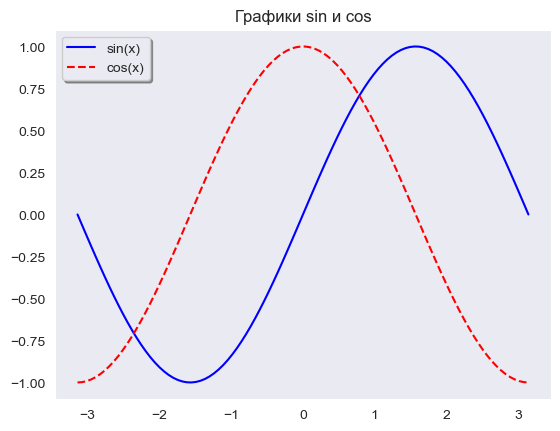

In [14]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set(title='Графики sin и cos')


ax.plot(x, y1, color='blue', linestyle='-', label='sin(x)')
ax.plot(x, y2, color='red', linestyle='--', label='cos(x)')
ax.legend(shadow = True)
ax.grid()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

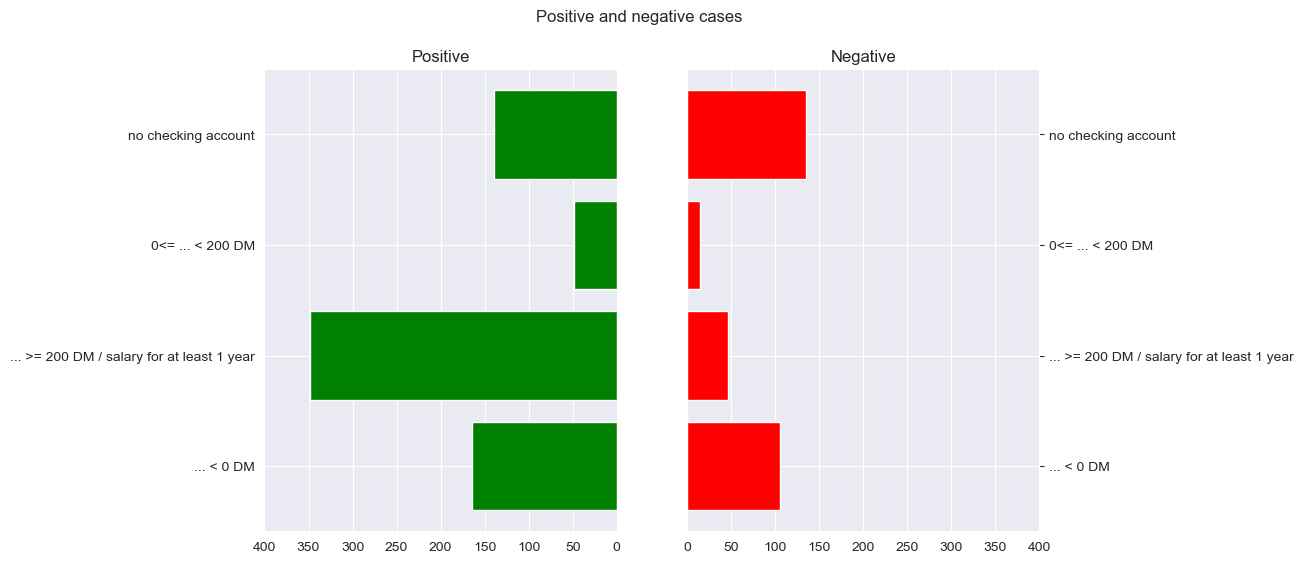

In [15]:
d = data[data.credit_risk == 'good'].groupby(['status']).count().sort_index().credit_risk
x1 = d.values
y1 = d.index

d = data[data.credit_risk == 'bad'].groupby(['status']).count().sort_index().credit_risk
x2 = d.values
y2 = d.index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.barh(y1, x1, color='green')
ax1.set_xlim(0, 400)
ax1.invert_xaxis()
ax1.set_title('Positive')

ax2.barh(y2, x2, color='red')
ax2.set_xlim(0, 400)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_title('Negative')

fig.suptitle('Positive and negative cases')
plt.show()

Как видим наибольшая уверенность дачи кредитов достигается при наибольшей зарплате. В то же время негативный сценарий чаще всего встречается, когда данных по аккаунту нет.

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

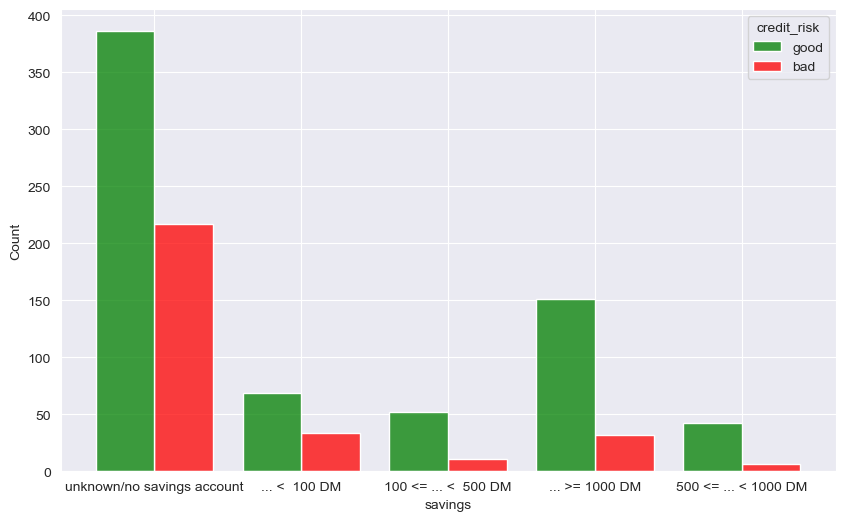

In [17]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(x = "savings", hue = "credit_risk", multiple='dodge', shrink=.8, palette=["green", "red"], data = data)

plt.show()

Большая доля одобрений содержится в накоплениях >= 1000. В то же время при маленьких накоплениях или отсутствии данных доля отказов сильно выше, чем при больших.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

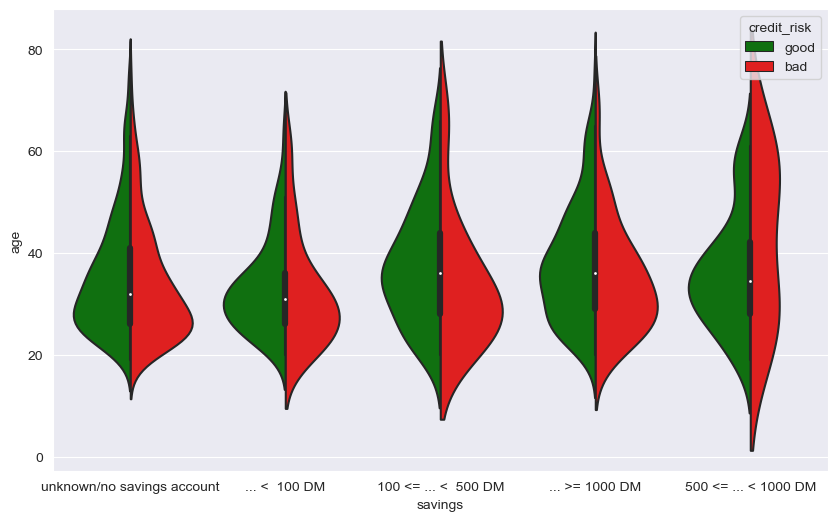

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.violinplot(x = "savings", y='age', hue = "credit_risk", split=True, palette=["green", "red"], data = data)
plt.show()

Видно, что большая часть (пики) одобрений при более высоком возрасте, чем неодобрений. Также при большом возрасте число одобрений больше, чем неодобрений в оределенных категориях накоплений.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

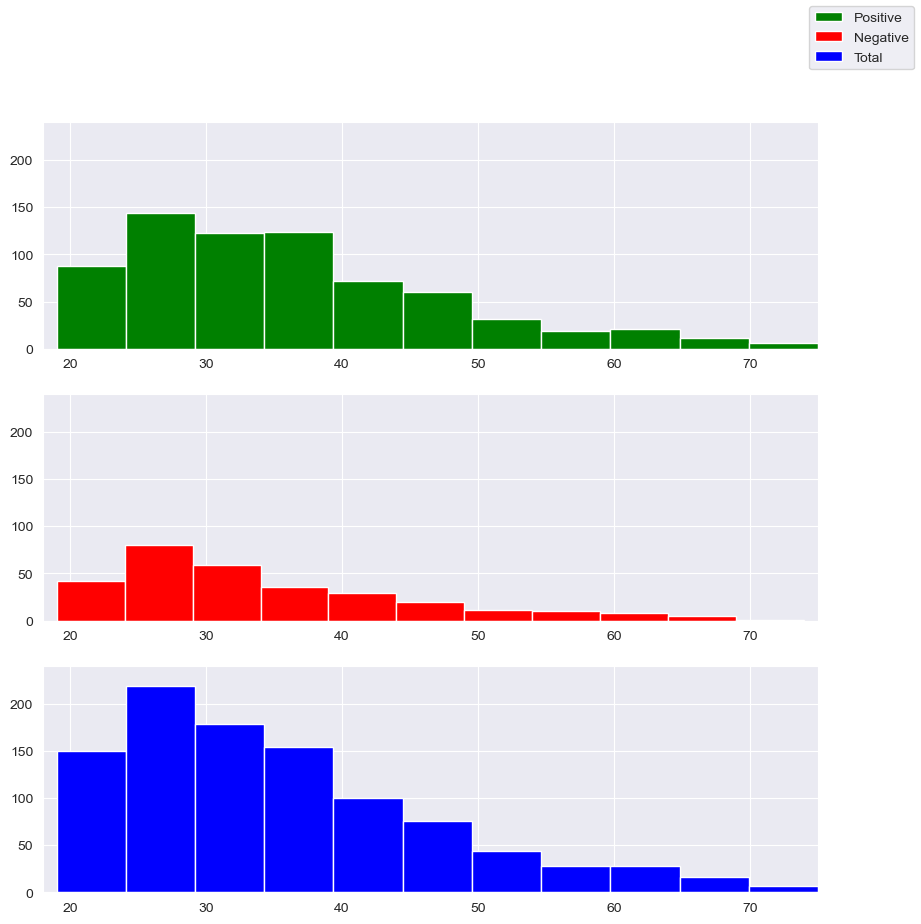

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.hist(data[data.credit_risk == 'good'].age, bins=11, color='green', label='Positive')
ax2.hist(data[data.credit_risk == 'bad'].age, bins=11, color='red', label='Negative')
ax3.hist(data.age, bins=11, color='blue', label='Total')
ax1.set_xlim(18, 75)
ax1.set_ylim(0, 240)
ax2.set_xlim(18, 75)
ax2.set_ylim(0, 240)
ax3.set_xlim(18, 75)
ax3.set_ylim(0, 240)
fig.legend()
plt.show()

Распределение общего количества, отказов, одобрений очень схожи, что не дает нам сделать вывод о разнице между отказами и одобрениями в зависимости от возраста.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

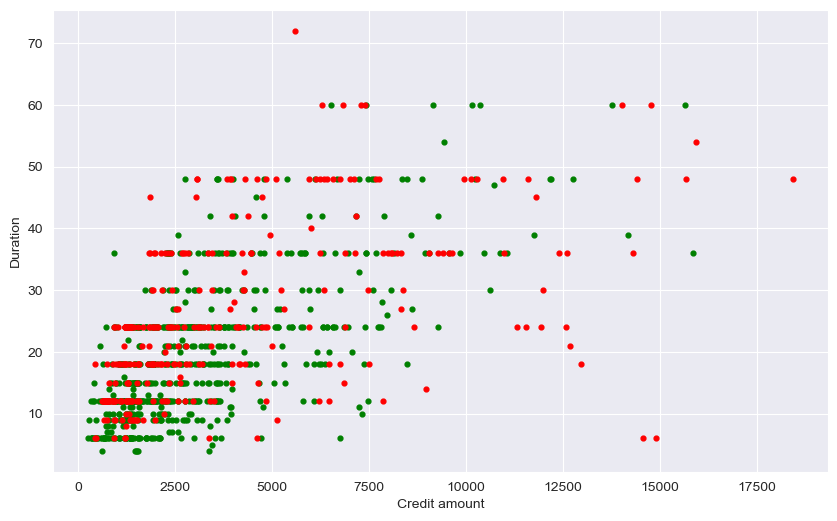

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data[data.credit_risk == 'good'].amount, data[data.credit_risk == 'good'].duration, color='green', s=12)
ax.scatter(data[data.credit_risk == 'bad'].amount, data[data.credit_risk == 'bad'].duration, color='red', s=12)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')

plt.show()

Масса одобренных клиентов находиться в относительно маленьких продолжительностях и суммах кредитов, также видно, что отказы часто кажутся выбросами графика.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

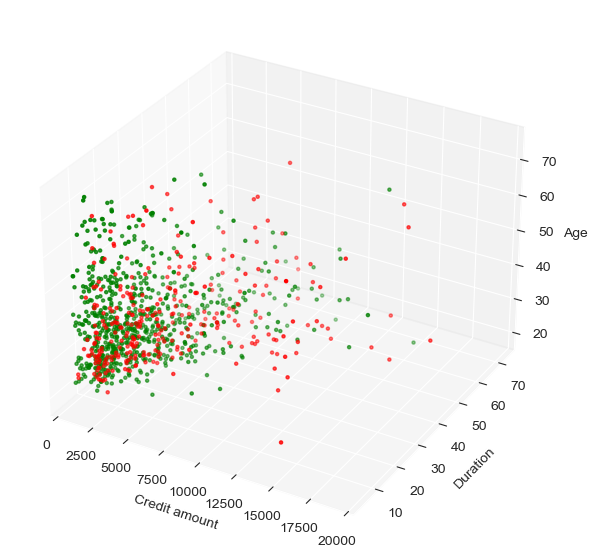

In [21]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(data[data.credit_risk == 'bad'].amount, data[data.credit_risk == 'bad'].duration, data[data.credit_risk == 'bad'].age, color='red', s=5)
ax.scatter(data[data.credit_risk == 'good'].amount, data[data.credit_risk == 'good'].duration, data[data.credit_risk == 'good'].age, color='green', s=5)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.xlim(0, 20000)
fig.set(facecolor='white')
ax.set(facecolor = 'white')
plt.show()

Масса одобренных клиентов находиться в относительно маленьких продолжительностях и суммах кредитов, также видно, что более возрастные люди скорее получают одобрение при условии вышесказанного.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

status - порядковый
savings - порядковый
employment_duration - порядковый
installment_rate - порядковый
present_residence - порядковый
number_credits - порядковый
people_liable - бинарный
telephone - бинарный
foreign_worker - бинарный
credit_risk - бинарный

In [22]:
data.status = data.status.replace(data.status.unique(), [0, 1, 3, 2])

In [23]:
data.savings = data.savings.replace(data.savings.unique(), [0, 1, 2, 4, 3])

In [24]:
data.employment_duration = data.employment_duration.replace(data.employment_duration.unique(), [1, 2, 3, 0, 4])

In [25]:
data.installment_rate = data.installment_rate.replace(data.installment_rate.unique(), [0, 2, 1, 3])

In [26]:
data.present_residence = data.present_residence.replace(data.present_residence.unique(), [3, 1, 2, 0])

In [27]:
data.number_credits = data.number_credits.replace(data.number_credits.unique(), [0, 1, 2, 3])

In [28]:
data.people_liable = data.people_liable.replace(data.people_liable.unique(), [0, 1])

In [29]:
data.telephone = data.telephone.replace(data.telephone.unique(), [0, 1])

In [30]:
data.foreign_worker = data.foreign_worker.replace(data.foreign_worker.unique(), [0, 1])

In [31]:
data.credit_risk = data.credit_risk.replace(data.credit_risk.unique(), [1, 0])

credit_history - категориальный
purpose - категориальный
personal_status_sex - категориальный
other_debtors - категориальный
property - категориальный
other_installment_plans - категориальный
housing - категориальный
job - категориальный

In [32]:
data = data.drop(columns=['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'])

In [33]:
data.head(5)

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [34]:
def prepredict(Xtest: np.array) -> np.array:
    res = np.corrcoef(X_train[:, 0], y_train)[0][1] * Xtest[:, 0] / X[:, 0].max()
    for i in range(1, 11): # не берем признак foreign_worker
        res = res + np.corrcoef(X_train[:, i], y_train)[0][1] * Xtest[:, i] / X[:, i].max()
    return res

def predict(Xtest: np.array) -> np.array:
    train_pred = prepredict(X_train)
    accuracy = 0
    num = 0
    for i in np.linspace(train_pred.min(), train_pred.max(), num=250): # подбираем параметр, который означает свободный коэффициент нашей многомерной плоскости отделяющей положительные предикты от отрицательных (основываемся на train выборке)
        accuracy_new = accuracy_score(y_train, train_pred >= i)
        if accuracy < accuracy_new:
            accuracy = accuracy_new
            num = i
    return prepredict(Xtest) >= num # с нужным свободным коэффициентом пропускаем на тестовой выборке

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/var/folders/_r/h4zgs51n1dq4hdtkvsl3026h0000gn/T/ipykernel_80289/1088633853.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.736

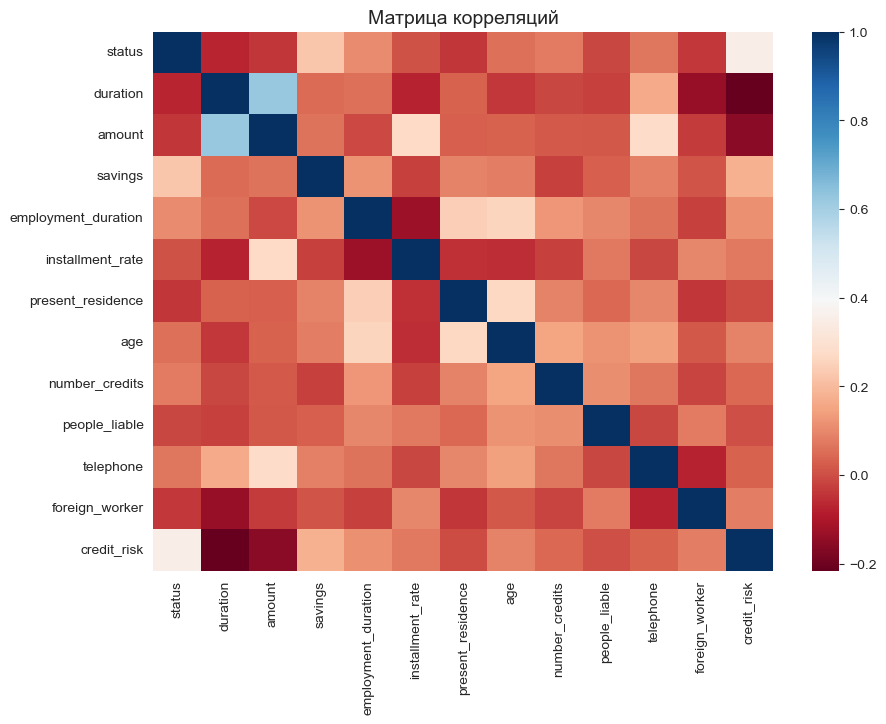

In [35]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))

sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap=plt.cm.RdBu, annot_kws={'size':20}, ax=ax)
ax.set_title('Матрица корреляций', fontsize=14)
plt.show()

Следующий график покажет примерно, как работает примененный метод предикшена кредитного риска

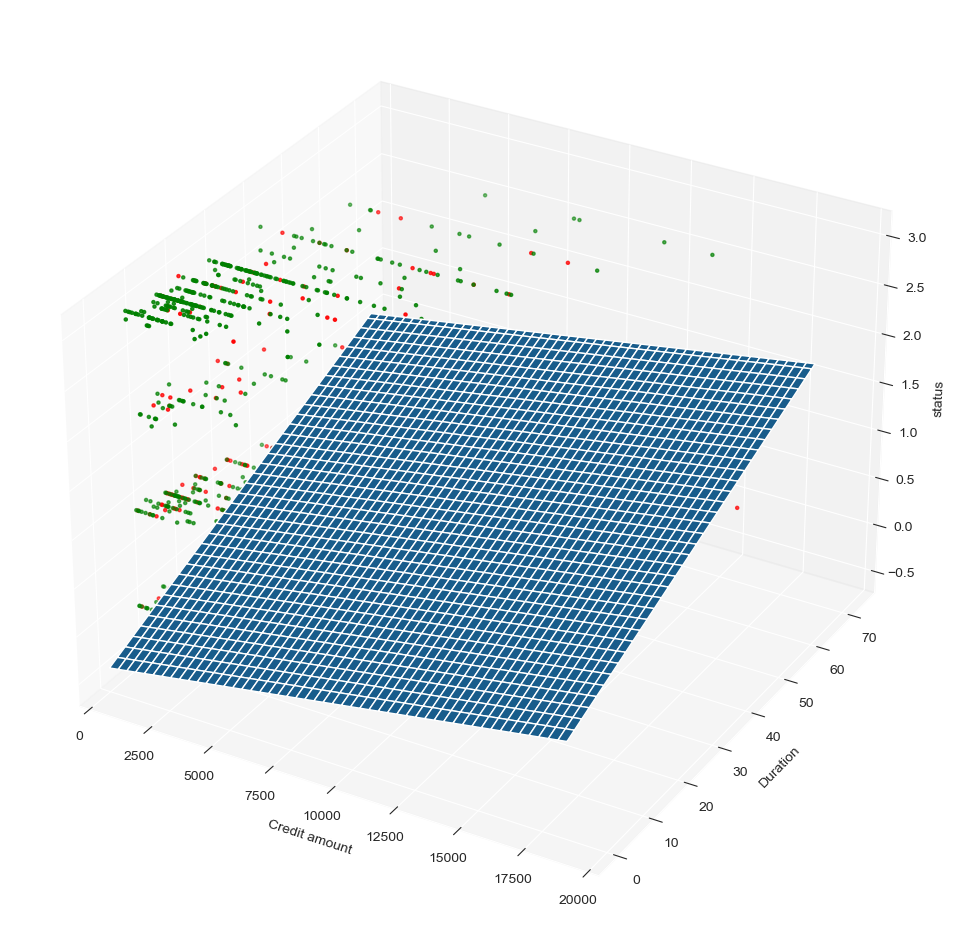

In [38]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data[data.credit_risk == 0].amount, data[data.credit_risk == 0].duration, data[data.credit_risk == 0].status, color='red', s=5)
ax.scatter(data[data.credit_risk == 1].amount, data[data.credit_risk == 1].duration, data[data.credit_risk == 1].status, color='green', s=5)
xx, yy = np.meshgrid(range(18424), range(72))
z = (xx * 3 / 18424 + 2 * yy * 3 / 72 - 1.9) / 4
ax.plot_surface(xx, yy, z, alpha=1)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('status')
plt.xlim(0, 20000)
fig.set(facecolor='white')
ax.set(facecolor = 'white')
plt.show()

Итак, данная плоскость (в нашем случае многомерная) делит пространство так, что тем точкам, которые выше плоскости мы дает позитивный предикт, а тем, что ниже плоскости соответственно негативный предикт.